In [36]:
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt



In [37]:
df_train_est = pd.read_csv('train_est_A.csv')
df_train_est_A = df_train_est.rename(columns={'Unnamed: 0': 'date_forecast'})
df_train_obs = pd.read_csv('train_obs_A.csv')
df_train_obs_A = df_train_obs.rename(columns={'Unnamed: 0': 'date_forecast'})
df_test = pd.read_csv('X_test_A.csv')
df_test_A = df_test.rename(columns={'Unnamed: 0': 'date_forecast'})

df_train_est = pd.read_csv('train_est_B.csv')
df_train_est_B = df_train_est.rename(columns={'Unnamed: 0': 'date_forecast'})
df_train_obs = pd.read_csv('train_obs_B.csv')
df_train_obs_B = df_train_obs.rename(columns={'Unnamed: 0': 'date_forecast'})
df_test = pd.read_csv('X_test_B.csv')
df_test_B = df_test.rename(columns={'Unnamed: 0': 'date_forecast'})

df_train_est = pd.read_csv('train_est_C.csv')
df_train_est_C = df_train_est.rename(columns={'Unnamed: 0': 'date_forecast'})
df_train_obs = pd.read_csv('train_obs_C.csv')
df_train_obs_C = df_train_obs.rename(columns={'Unnamed: 0': 'date_forecast'})
df_test = pd.read_csv('X_test_C.csv')
df_test_C = df_test.rename(columns={'Unnamed: 0': 'date_forecast'})

In [38]:
df_train_est_A.set_index('date_forecast', inplace=True)

df_train_obs_A.set_index('date_forecast', inplace=True)

df_test_A.set_index('date_forecast', inplace=True)

df_train_est_B.set_index('date_forecast', inplace=True)

df_train_obs_B.set_index('date_forecast', inplace=True)

df_test_B.set_index('date_forecast', inplace=True)

df_train_est_C.set_index('date_forecast', inplace=True)

df_train_obs_C.set_index('date_forecast', inplace=True)

df_test_C.set_index('date_forecast', inplace=True)


In [39]:
df_test_C.shape

(720, 42)

In [40]:
df_test = df_test_A
#= pd.concat([, df_test_B])
# = pd.concat([df_A, df_test_C])
print(df_test.shape)# Ora puoi concatenare questi tre dataframe in uno solo, se necessario.


(720, 45)


In [41]:
df_train = pd.concat([df_train_obs_A, df_train_est_A])

# Concatenazione per B
df_B = pd.concat([df_train_obs_B, df_train_est_B])

# Concatenazione per C
df_C = pd.concat([df_train_obs_C, df_train_est_C])

# Ora puoi concatenare questi tre dataframe in uno solo, se necessario.
#df_train = pd.concat([df_A, df_B, df_C])
df_train

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.700,1.22825,1728.950,0.000,0.000,1728.950,0.0,280.300,0.000,0.000,...,-3.77425,0.000,286.22500,100.000,40386.477,3.600,-3.575,-0.500,0.0,0.00
2019-06-02 23:00:00,7.700,1.22350,1689.825,0.000,0.000,1689.825,0.0,280.300,0.000,0.000,...,-4.35725,0.000,286.90000,100.000,33770.650,3.350,-3.350,0.275,0.0,0.00
2019-06-03 00:00:00,7.875,1.21975,1563.225,0.000,0.000,1563.225,0.0,280.650,0.000,0.000,...,-3.30950,0.000,286.95000,100.000,13595.500,3.050,-2.950,0.750,0.0,0.00
2019-06-03 01:00:00,8.425,1.21800,1283.425,208.650,0.750,1283.425,0.0,281.675,0.300,526.775,...,-0.82250,0.000,286.75000,100.000,2321.850,2.725,-2.600,0.875,0.0,0.00
2019-06-03 02:00:00,8.950,1.21800,1003.500,32468.150,23.100,1003.500,0.0,282.500,11.975,22068.950,...,3.05125,0.000,286.45000,99.225,11634.800,2.550,-2.350,0.925,0.0,19.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1674.200,84464.945,4.225,542.700,0.0,272.425,2.825,56431.050,...,-0.18050,0.000,275.02500,96.700,23417.074,5.175,4.800,1.925,0.0,9.02
2023-04-30 20:00:00,4.500,1.27975,1762.400,2270.875,0.000,546.400,0.0,272.300,0.000,5067.875,...,-5.17600,0.000,274.65002,94.525,21084.050,4.650,4.025,2.300,0.0,0.00
2023-04-30 21:00:00,4.500,1.28100,1696.650,0.000,0.000,548.350,0.0,272.300,0.000,0.000,...,-8.95075,0.000,274.52500,95.675,20792.500,4.450,3.575,2.600,0.0,0.00


In [42]:
features_name = [c for c in df_train.columns if c != 'pv_measurement']
target = 'pv_measurement'
X = df_train[features_name]
y = df_train[target]
X_test = df_test[features_name]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False)

In [80]:
df =X_train

# Definisci una funzione per rimuovere gli outlier in una colonna utilizzando IQR
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return column[(column >= lower_limit) & (column <= upper_limit)]

# Applica la funzione remove_outliers a ciascuna colonna del DataFrame
X_Train = df.apply(remove_outliers)

In [81]:
df =X_test

# Definisci una funzione per rimuovere gli outlier in una colonna utilizzando IQR
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return column[(column >= lower_limit) & (column <= upper_limit)]

# Applica la funzione remove_outliers a ciascuna colonna del DataFrame
X_test = df.apply(remove_outliers)

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train_v1,columns=X_train.columns,index=X_train.index)
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns,index=X_test.index)

In [10]:
"""
scaled_X_train['diffuse_rad'] = scaled_X_train['diffuse_rad:W'] + scaled_X_train['diffuse_rad_1h:J']
scaled_X_train['direct_rad'] = scaled_X_train['direct_rad:W'] + scaled_X_train['direct_rad_1h:J']
scaled_X_train['direct_rad'] = scaled_X_train['direct_rad'].astype(float)
scaled_X_train['diffuse_rad'] = scaled_X_train['diffuse_rad'].astype(float)
display(X_train)
"""
# Calcola la media tra le due colonne
scaled_X_train['radiation'] = (scaled_X_train['direct_rad:W'] + scaled_X_train['diffuse_rad:W'])

In [11]:
"""
scaled_X_test['diffuse_rad'] = scaled_X_test['diffuse_rad:W'] + scaled_X_test['diffuse_rad_1h:J']
scaled_X_test['direct_rad'] = scaled_X_test['direct_rad:W'] + scaled_X_test['direct_rad_1h:J']
scaled_X_test['direct_rad'] = scaled_X_test['direct_rad'].astype(float)
scaled_X_test['diffuse_rad'] = scaled_X_test['diffuse_rad'].astype(float)
"""
# Calcola la media tra le due colonne
scaled_X_test['radiation'] = (scaled_X_test['direct_rad:W'] + scaled_X_test['diffuse_rad:W']) 

In [83]:
fig, ax = plt.subplots()

x = 1
y = y_train
plt.plot( y)
plt.title('Varianza delle colonne')
plt.xlabel('Varianza')
plt.ylabel('Colonne')
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001A133E0AE80>
Traceback (most recent call last):
  File "C:\Users\claxl\anaconda3\Lib\weakref.py", line 370, in remove
    self = selfref()
           ^^^^^^^^^
KeyboardInterrupt: 


Error in callback <function _draw_all_if_interactive at 0x000001A1466AB920> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A152283B00> (for post_execute):


KeyboardInterrupt: 

In [85]:
scaled_X_train.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,...,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000,30676.000000
mean,0.354177,0.373019,0.220620,0.194525,0.193378,0.142403,0.512062,0.602150,0.131437,0.132000,...,0.505657,0.508876,0.044808,0.487826,0.741374,0.469874,0.227993,0.429645,0.536828,0.000187
std,0.167121,0.129475,0.187118,0.290663,0.289677,0.147227,0.092038,0.157129,0.192205,0.190726,...,0.286962,0.242480,0.081562,0.148032,0.334091,0.258597,0.133402,0.155425,0.110632,0.012194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.284444,0.102452,0.000000,0.000000,0.051263,0.500000,0.491187,0.000000,0.000000,...,0.254477,0.342464,0.000000,0.380791,0.544250,0.231255,0.124528,0.313433,0.462462,0.000000
50%,0.330330,0.364444,0.151296,0.011388,0.008188,0.097435,0.500000,0.609283,0.010759,0.018404,...,0.506940,0.505731,0.000000,0.485876,0.929250,0.523412,0.203774,0.411126,0.536036,0.000000
75%,0.468468,0.456889,0.269974,0.319930,0.331068,0.168032,0.500000,0.722092,0.221202,0.222140,...,0.757777,0.684067,0.076923,0.588136,0.999000,0.694421,0.305660,0.534939,0.605105,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(scaled_X_train, y_train)
# get importance
importance = rf.feature_importances_

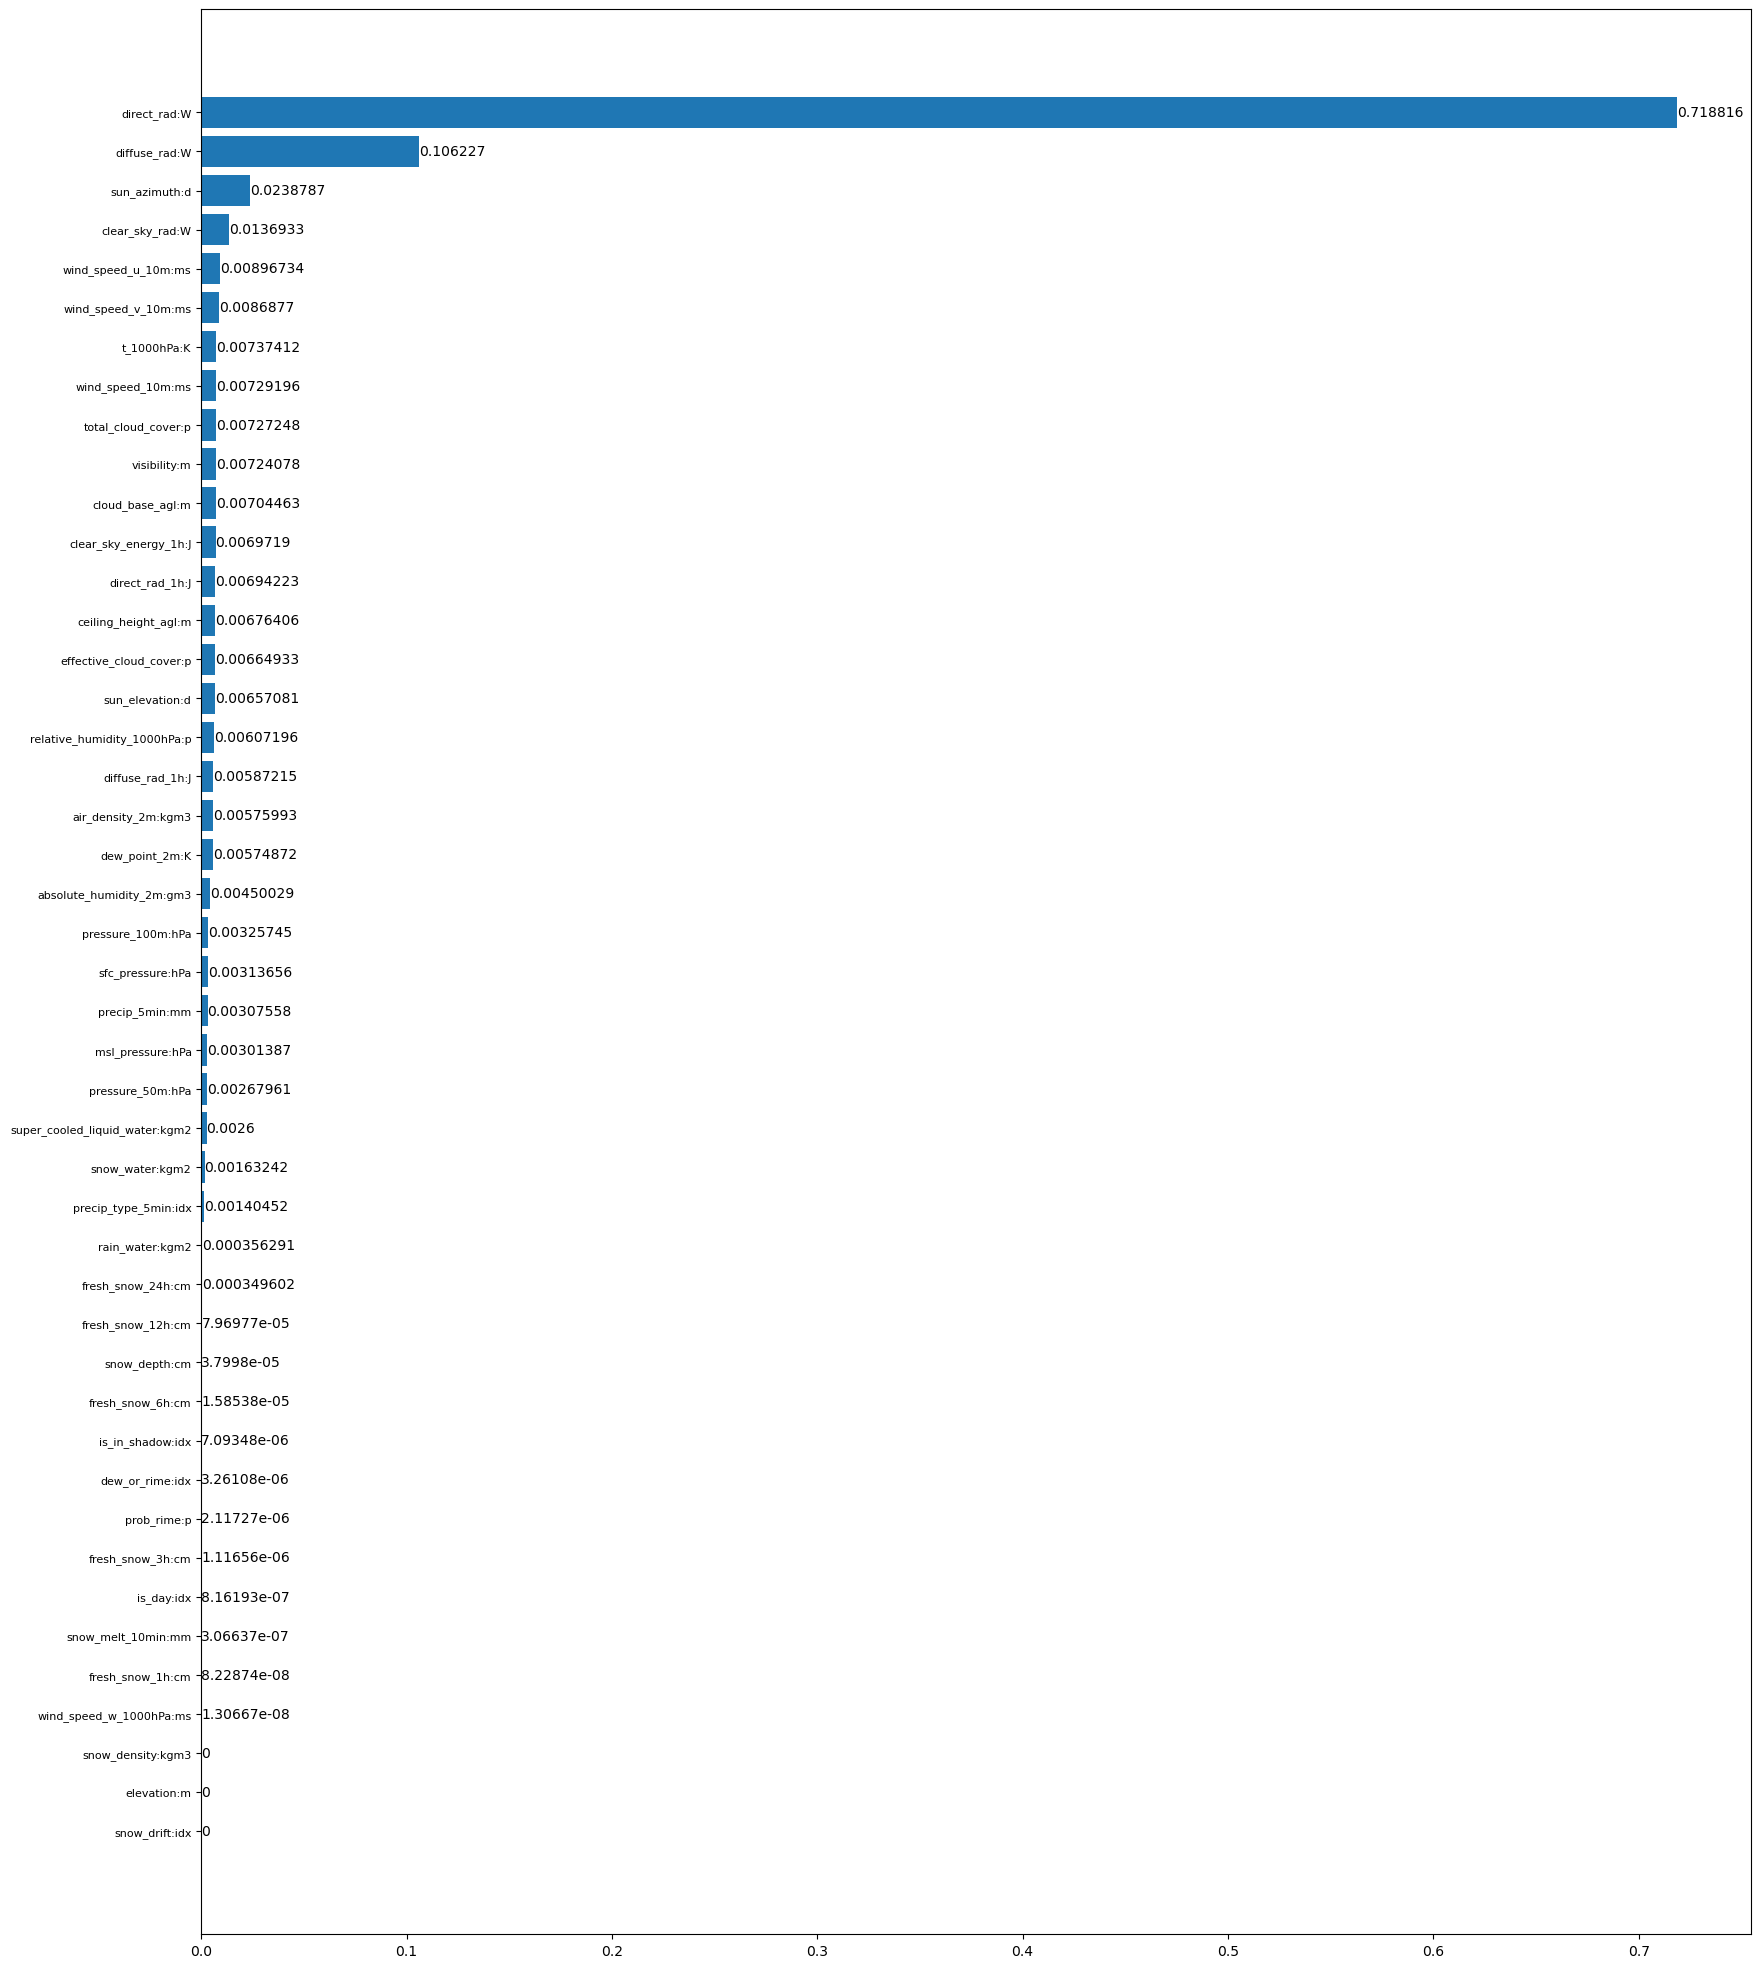

In [87]:
dataRF = pd.DataFrame()
dataRF['Feature_name'] = scaled_X_train.columns
dataRF['importance'] = importance
dataRF = dataRF.sort_values(by='importance',ascending = True)
plt.figure(figsize=(20, 25))  # width:20, height:3

plot = plt.barh(dataRF['Feature_name'],dataRF['importance'])
plt.bar_label(plot)
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels


In [88]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(scaled_X_train, y_train)

  # get importance
importance = model.feature_importances_
dataXGB = pd.DataFrame()
dataXGB['Feature_name'] = scaled_X_train.columns
dataXGB['importance'] = importance
dataXGB = dataXGB.sort_values(by='importance',ascending=False)

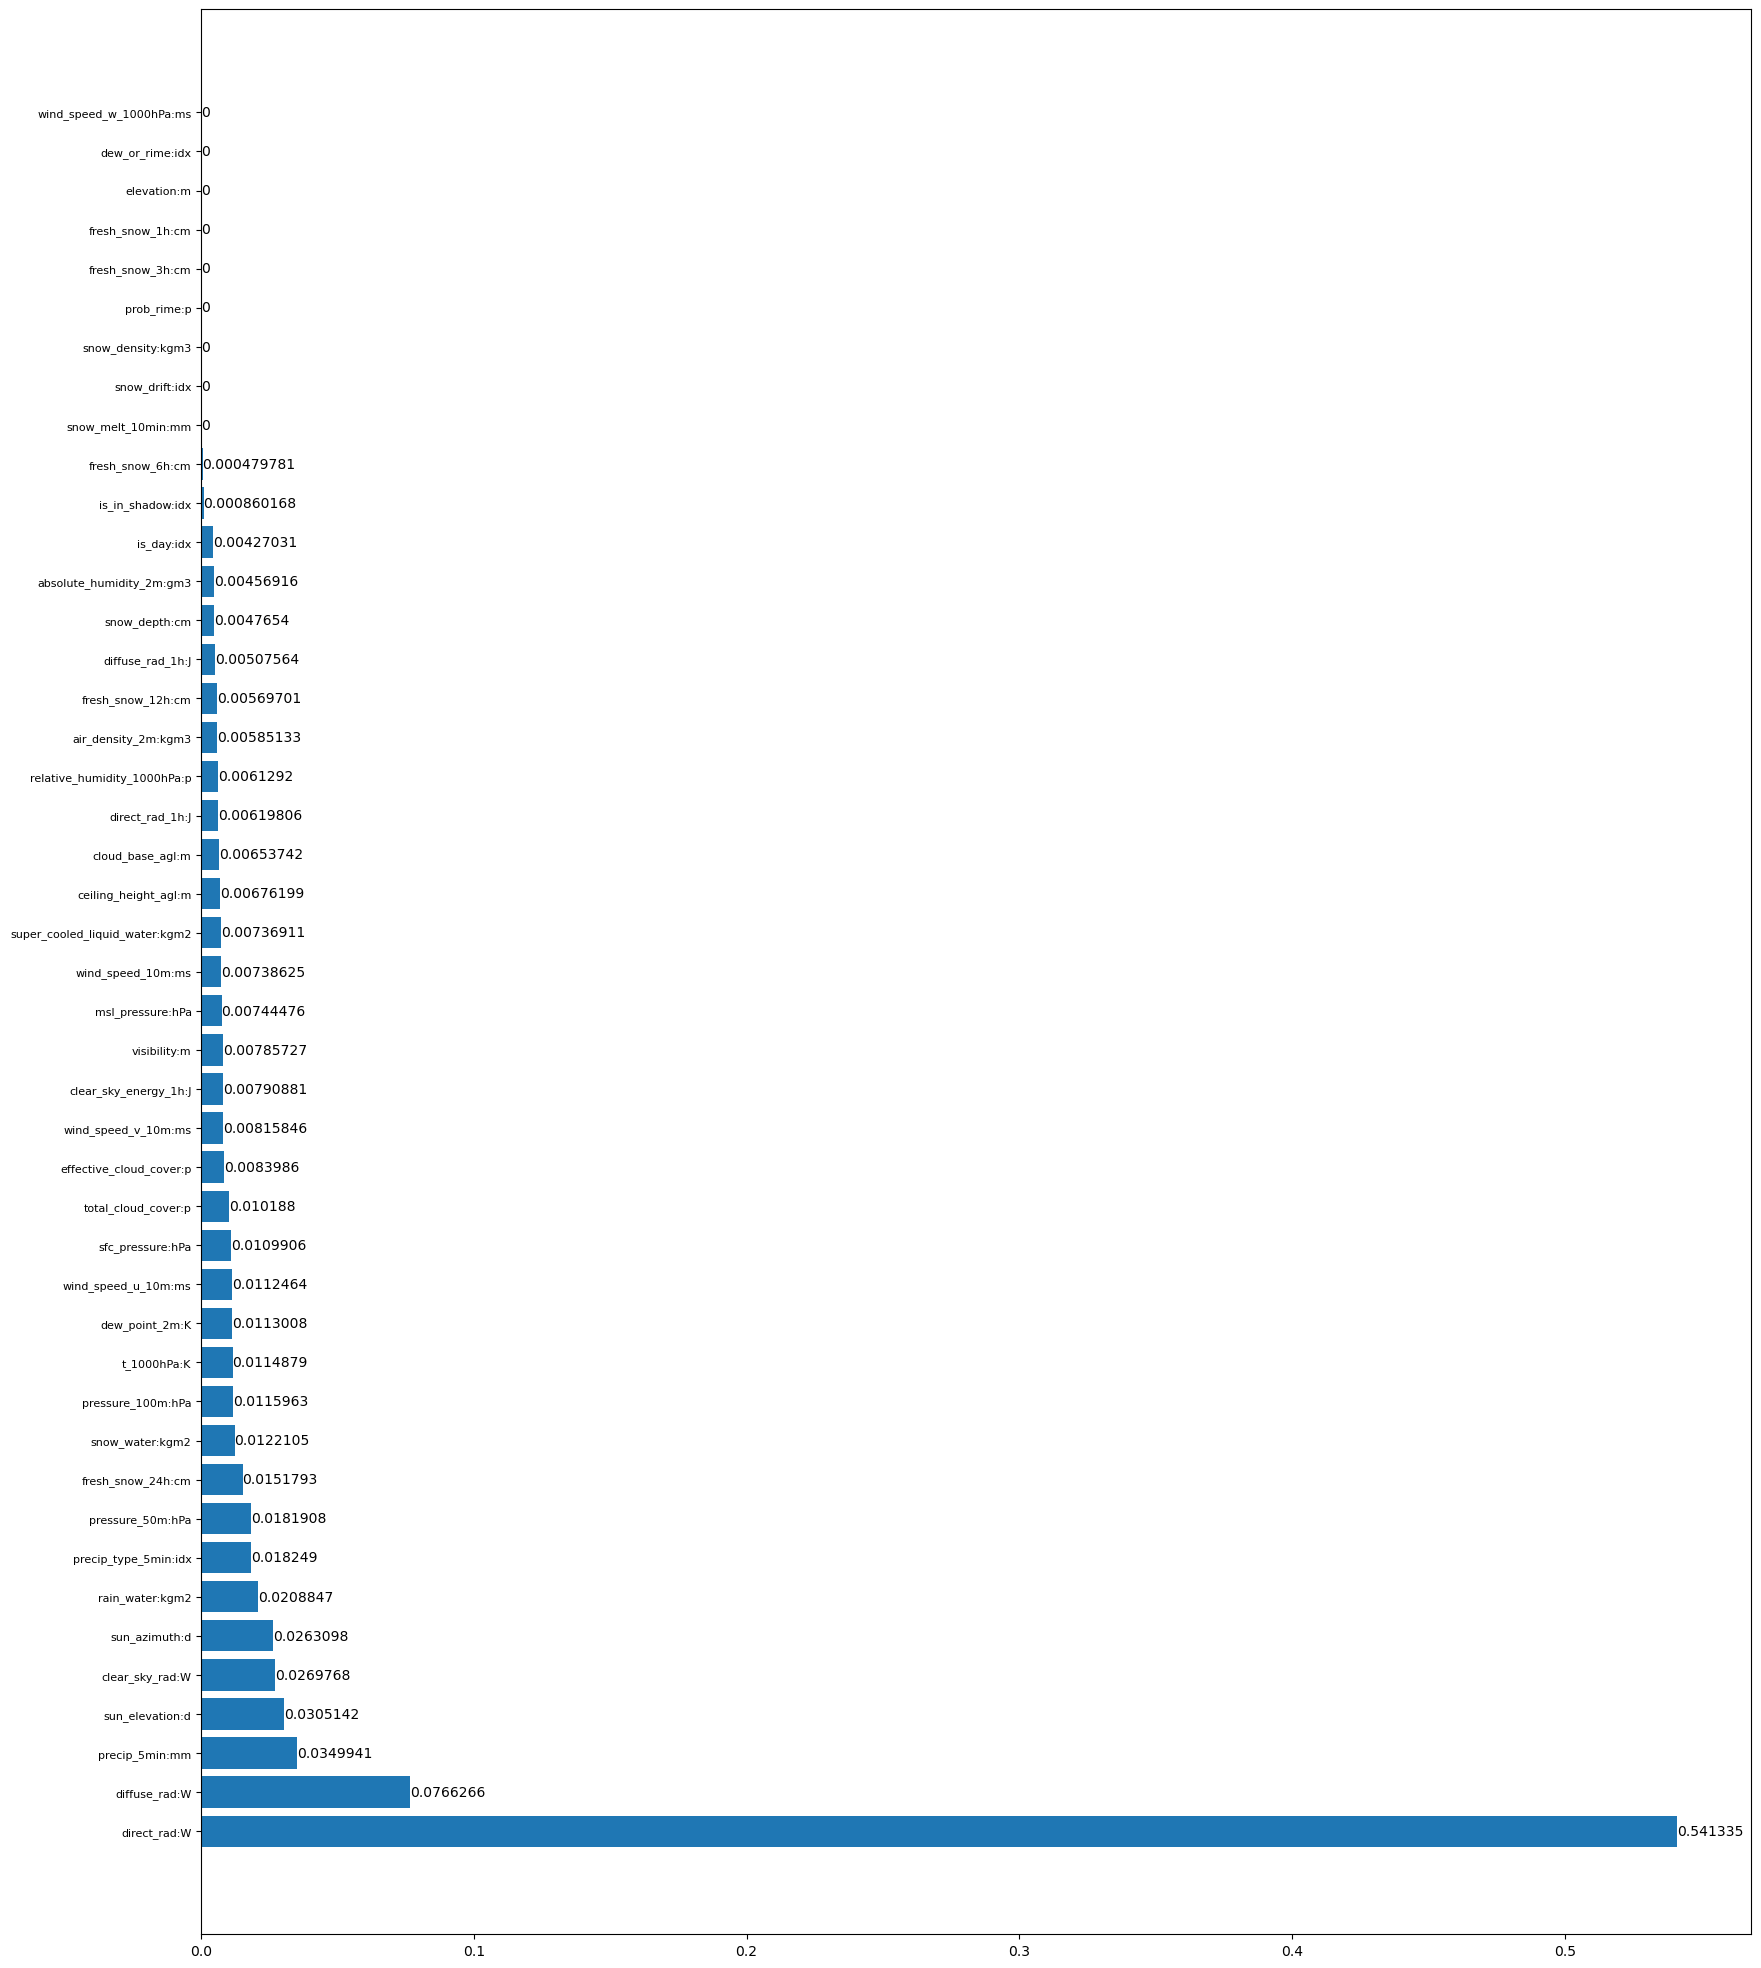

In [89]:

plt.figure(figsize=(20, 25))  # width:20, height:3

plot = plt.barh(dataXGB['Feature_name'],dataXGB['importance'])
plt.bar_label(plot)
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels

In [90]:
# Specifica il threshold
threshold = 0.01

# Seleziona le righe in cui il valore nella colonna 'Colonna1' supera il threshold
dataRF = dataRF[dataRF['importance'] > threshold]

In [91]:
# Specifica il threshold
threshold = 0.01

# Seleziona le righe in cui il valore nella colonna 'Colonna1' supera il threshold
dataXGB = dataXGB[dataXGB['importance'] > threshold]

In [92]:
def create_sequences(X, y, time_steps):
    X_sequences, y_targets = [], []
    for i in range(len(X) - time_steps):
        X_sequences.append(X[i:i+time_steps])
        y_targets.append(y[i+time_steps])
    return np.array(X_sequences), np.array(y_targets)

# Imposta il numero di passaggi temporali (time steps)
time_steps = 1 # Personalizza in base alle tue esigenze

# Crea le sequenze e i target per addestramento
X_train_sequences, y_train_sequences = create_sequences(scaled_X_train[dataXGB['Feature_name']], y_train, time_steps)
X_test_sequences, y_test_sequences = create_sequences(scaled_X_test[dataXGB['Feature_name']], y_train, time_steps)

# Verifica le dimensioni dei dati
print("Dimensioni dei dati di addestramento:", X_train_sequences.shape, y_train_sequences.shape)
print("Dimensioni dei dati di test:", X_test_sequences.shape, y_test_sequences.shape)


Dimensioni dei dati di addestramento: (30675, 1, 17) (30675,)
Dimensioni dei dati di test: (3384, 1, 17) (3384,)


In [93]:
def create_sequences(df):
    sequences = []
    sequence_length = 1  # You want sequences of length 24

    # Padding the start of the DataFrame with (sequence_length-1) copies of the first row
    padded_df = pd.concat([pd.DataFrame([df.iloc[0]] * (sequence_length-1), columns=df.columns), df], ignore_index=True)

    # Now, every row in the original DataFrame will be the end of a 24-row sequence in the result
    for end_idx in range(sequence_length-1, len(padded_df)):
        sequences.append(padded_df.iloc[end_idx-sequence_length+1:end_idx+1].values)

    return np.array(sequences)  # Returning a NumPy array of shape (720, 24, 5)

# Assuming `your_dataframe` is your DataFrame
X_test_sequences = create_sequences(scaled_X_test[dataXGB['Feature_name']])
X_test_sequences.shape

(3385, 1, 17)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Crea il modello LSTM
model = Sequential()
model.add(LSTM(256, activation='ReLU', return_sequences=True, input_shape=(time_steps, X_train_sequences.shape[2])))
model.add(LSTM(256, activation='ReLU'))
model.add(Dense(units=256,
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mae')

# Addestra il modello
model.fit(X_train_sequences, y_train_sequences, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
959/959 [==============================] - 10s 9ms/step - loss: 282.9032
Epoch 2/50
959/959 [==============================] - 9s 9ms/step - loss: 256.6132
Epoch 3/50
959/959 [==============================] - 9s 10ms/step - loss: 243.7312
Epoch 4/50
959/959 [==============================] - 9s 9ms/step - loss: 234.5311
Epoch 5/50
959/959 [==============================] - 9s 10ms/step - loss: 233.2615
Epoch 6/50
959/959 [==============================] - 9s 9ms/step - loss: 228.2399
Epoch 7/50
959/959 [==============================] - 9s 9ms/step - loss: 224.6311
Epoch 8/50
959/959 [==============================] - 9s 9ms/step - loss: 221.8538
Epoch 9/50
959/959 [==============================] - 9s 9ms/step - loss: 221.7746
Epoch 10/50
959/959 [==============================] - 9s 10ms/step - loss: 219.7143
Epoch 11/50
959/959 [==============================] - 8s 9ms/step - loss: 218.5044
Epoch 12/50
959/959 [==============================] - 9s 9ms/step - loss: 217.25

In [76]:

# Valuta il modello
y_pred = model.predict(X_test_sequences)
np.sum(np.isnan(y_pred))


107/107 [==============================] - 0s 2ms/step


In [78]:
arr_no_nan = np.where(np.isnan(y_pred), np.nanmedian(y_pred), y_pred)

In [79]:
mae = mean_absolute_error(y_test, arr_no_nan)
mae

170.89309288757642

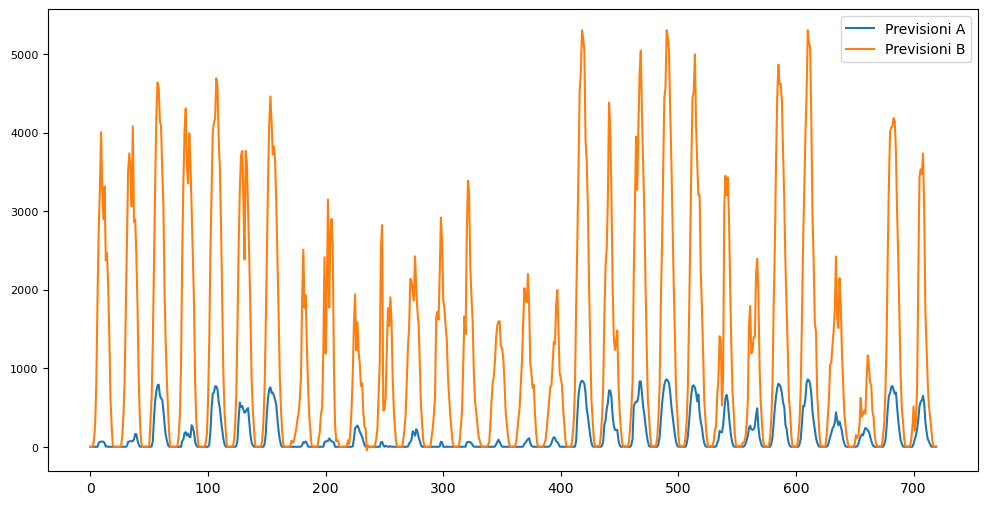

(720,)

In [595]:
# Plot dei risultati
plt.figure(figsize=(12, 6))
#plt.plot( y_train[50:150], label="Dati di test")
plt.plot( t_test, label="test")
plt.plot( y_pred, label="pred")


plt.legend()
plt.show()
y_pred.shape

In [596]:
y_a_pred = y_pred

In [613]:
y_b_pred = y_pred

In [629]:
y_c_pred = y_pred

In [630]:
y_a_pred_list = y_a_pred.flatten().tolist()
y_b_pred_list = y_b_pred.flatten().tolist()
y_c_pred_list = y_c_pred.flatten().tolist()
y_a_pred.flatten().shape

(720,)

In [631]:
all_preds = y_a_pred_list + y_b_pred_list + y_c_pred_list
all_preds = [0 if i < 0 else i for i in all_preds]

In [632]:
dict_preds = {'id' : [i for i in range(2160)],  'prediction' : all_preds  } #'time' : hourly_date_range, 'location' : location_list
send_in_df = pd.DataFrame(dict_preds)
send_in_df.set_index('id', inplace=True)
send_in_df['prediction'] = send_in_df['prediction'].astype(float)
send_in_df

,prediction
id,
0,0.12
1,0.12
2,0.12
3,95.59
4,299.38
...,...
2155,33.83
2156,16.69
2157,1.68


In [633]:
send_in_df.to_csv('XGB.csv')

In [568]:
scaled_X_train

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,...,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,diffuse_rad,direct_rad,radiation
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,0.42,0.30,0.00,0.00,0.50,0.69,0.00,0.00,0.00,0.00,...,0.62,1.00,0.58,0.27,0.20,0.47,0.00,0.00,0.00,0.00
2019-06-02 23:00:00,0.42,0.28,0.00,0.00,0.50,0.69,0.00,0.00,0.00,0.00,...,0.63,1.00,0.49,0.25,0.21,0.52,0.00,0.00,0.00,0.00
2019-06-03 00:00:00,0.43,0.27,0.00,0.00,0.50,0.70,0.00,0.00,0.00,0.00,...,0.63,1.00,0.19,0.23,0.23,0.55,0.00,0.00,0.00,0.00
2019-06-03 01:00:00,0.46,0.26,0.00,0.00,0.50,0.72,0.00,0.00,0.00,0.00,...,0.63,1.00,0.03,0.20,0.25,0.56,0.00,0.00,0.00,0.00
2019-06-03 02:00:00,0.50,0.26,0.01,0.03,0.50,0.74,0.04,0.02,0.00,0.00,...,0.62,0.99,0.17,0.19,0.26,0.56,0.00,0.05,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-08 20:00:00,0.10,0.59,0.00,0.00,0.50,0.30,0.00,0.00,0.00,0.00,...,0.21,0.99,0.41,0.29,0.19,0.46,0.00,0.00,0.00,0.00
2022-12-08 21:00:00,0.10,0.58,0.00,0.00,0.50,0.31,0.00,0.00,0.00,0.00,...,0.21,0.97,0.49,0.29,0.18,0.45,0.00,0.00,0.00,0.00
2022-12-08 22:00:00,0.10,0.59,0.00,0.00,0.50,0.31,0.00,0.00,0.00,0.00,...,0.21,0.96,0.48,0.30,0.18,0.45,0.00,0.00,0.00,0.00


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.5, 0.1, 0.001],
    'reg_alpha': [0, 0.1, 0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(scaled_X_train, y_train)
best_params = grid_search.best_params_

In [ ]:
best_params

In [ ]:
# Now we are going to find the right amount of features to use:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

xgb_model_A = XGBRegressor(**best_params)
xgb_model_A.fit(scaled_X_train, y_train)

  # Make predictions on the test set
y_pred = xgb_model_A.predict(scaled_X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)